In [1]:
#1.read the data
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv(r"Downloads\Fish.csv")

In [3]:
dataset.head(3)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961


In [4]:
dataset.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Species']=le.fit_transform(dataset['Species'])

In [6]:
dataset['Species'].unique()

array([0, 4, 6, 1, 2, 3, 5], dtype=int64)

In [7]:
dataset.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.52,4.0200
1,0,290.0,24.0,26.3,31.2,12.48,4.3056


In [8]:
x=dataset.iloc[:,[0,2,3,4,5,6]].values
y=dataset.iloc[:,1:2].values

In [9]:
x.shape

(159, 6)

In [10]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
z=one.fit_transform(x[:,0:1]).toarray()
x=np.delete(x,0,axis=1)
x=np.concatenate((z,x),axis=1)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [11]:
x.shape

(159, 12)

In [12]:
y.shape

(159, 1)

In [13]:
x

array([[ 1.    ,  0.    ,  0.    , ..., 30.    , 11.52  ,  4.02  ],
       [ 1.    ,  0.    ,  0.    , ..., 31.2   , 12.48  ,  4.3056],
       [ 1.    ,  0.    ,  0.    , ..., 31.1   , 12.3778,  4.6961],
       ...,
       [ 0.    ,  0.    ,  0.    , ..., 13.8   ,  2.277 ,  1.2558],
       [ 0.    ,  0.    ,  0.    , ..., 15.2   ,  2.8728,  2.0672],
       [ 0.    ,  0.    ,  0.    , ..., 16.2   ,  2.9322,  1.8792]])

In [14]:
y

array([[ 242. ],
       [ 290. ],
       [ 340. ],
       [ 363. ],
       [ 430. ],
       [ 450. ],
       [ 500. ],
       [ 390. ],
       [ 450. ],
       [ 500. ],
       [ 475. ],
       [ 500. ],
       [ 500. ],
       [ 340. ],
       [ 600. ],
       [ 600. ],
       [ 700. ],
       [ 700. ],
       [ 610. ],
       [ 650. ],
       [ 575. ],
       [ 685. ],
       [ 620. ],
       [ 680. ],
       [ 700. ],
       [ 725. ],
       [ 720. ],
       [ 714. ],
       [ 850. ],
       [1000. ],
       [ 920. ],
       [ 955. ],
       [ 925. ],
       [ 975. ],
       [ 950. ],
       [  40. ],
       [  69. ],
       [  78. ],
       [  87. ],
       [ 120. ],
       [   0. ],
       [ 110. ],
       [ 120. ],
       [ 150. ],
       [ 145. ],
       [ 160. ],
       [ 140. ],
       [ 160. ],
       [ 169. ],
       [ 161. ],
       [ 200. ],
       [ 180. ],
       [ 290. ],
       [ 272. ],
       [ 390. ],
       [ 270. ],
       [ 270. ],
       [ 306. ],
       [ 540. 

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train.shape

(127, 12)

In [17]:
x_test.shape

(32, 12)

In [18]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred=mlr.predict(x_test)

In [20]:
y_pred

array([[ 428.88533577],
       [  98.08363614],
       [ 216.67998922],
       [ 208.66936638],
       [ 657.24094116],
       [ 876.38855413],
       [ 665.97861965],
       [ 407.27203048],
       [ 965.65306863],
       [ 146.62291102],
       [ 255.15532231],
       [ 561.63685124],
       [ 765.67575361],
       [1012.38234027],
       [-118.72798063],
       [  14.47341216],
       [ 137.60789564],
       [1155.53572308],
       [ 170.97092949],
       [ 724.93548455],
       [-128.48675188],
       [ 525.45508599],
       [ 175.3519065 ],
       [1322.74816983],
       [ -23.0873263 ],
       [ 475.44172778],
       [ 719.96841977],
       [ 280.94571114],
       [ 885.12085107],
       [ -16.63412226],
       [ 585.26038657],
       [ 164.22863371]])

In [21]:
x_test


array([[ 1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        27.6   , 30.    , 35.    , 12.67  ,  4.69  ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    ,
        19.    , 20.5   , 22.8   ,  6.4752,  3.3516],
       [ 0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        21.5   , 23.5   , 25.    ,  6.275 ,  3.725 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    ,
        20.5   , 22.5   , 25.3   ,  7.0334,  3.8203],
       [ 0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        32.    , 34.5   , 36.5   , 10.2565,  6.3875],
       [ 0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        37.    , 40.    , 42.5   , 11.73  ,  7.225 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,
        33.7   , 36.4   , 39.6   , 11.7612,  6.5736],
       [ 0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  0.    ,
        34.8   , 37.3   , 39.8   ,  6.2884,  4.0198],


In [22]:
y_test

array([[ 390. ],
       [   0. ],
       [ 170. ],
       [ 160. ],
       [ 556. ],
       [ 900. ],
       [ 800. ],
       [ 300. ],
       [ 975. ],
       [ 115. ],
       [ 200. ],
       [ 456. ],
       [1000. ],
       [1000. ],
       [  60. ],
       [  78. ],
       [ 145. ],
       [1600. ],
       [ 130. ],
       [ 720. ],
       [  55. ],
       [ 390. ],
       [ 120. ],
       [1650. ],
       [  90. ],
       [ 450. ],
       [ 700. ],
       [ 270. ],
       [ 850. ],
       [   9.7],
       [ 650. ],
       [ 110. ]])

In [23]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)

In [24]:
accuracy

0.9102350316202581

In [25]:
y1=mlr.predict([[1,0,0,0,0,0,0,23.2,25.4,30.0,11.52,4.02]])

In [26]:
y1[0][0]

264.596083487324

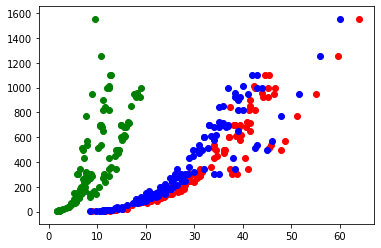

In [29]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:,9],y_train[:,0],color="red")
plt.scatter(x_train[:,8],y_train[:,0],color="blue")
plt.scatter(x_train[:,10],y_train[:,0],color="green")

In [31]:
#1.random forest regression implementation
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor(n_estimators=10,random_state=0)#<------This is an instance<------here we are giving random splits to the data set and apply decision tree for each and calculate accordingly
rdr.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [32]:
yrdr=rdr.predict(x_test)

In [33]:
accuracyran=r2_score(y_test,yrdr)

In [34]:
accuracyran

0.9737362262083346